<a href="https://colab.research.google.com/github/omartarek2000/Blizzard/blob/master/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:  Omar Tarek Abdelaziz Elsherief

ID: 46-2535

Tutorial: T1

---

Name: Mohamed Ayman Abdelziz

ID: 46-1260

Tutorial: T1

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

make: ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']

model: ['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sierra 1500' 'Cooper' 'XJ' 'Edge' 'Focus' 'Avenger'
 'Civic' 'Escape' 'Camry' 'Encore

In [ ]:
#Checking for the information in the dataframe and their sums
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
#Check the top of the data frame
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
#Checking the last entries in the dataframe
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46572,2006,Volvo,S40,2.4i,Sedan,automatic,yv1ms390462186357,ca,3.8,56993.0,gray,gray,prestige auto wholesale inc,6350,7000,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0,silver,black,kia motors finance,9700,9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


## Data Pre-Processing & Cleaning

1.   List item
2.   List item



_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#Capitalizing the first letter for formating
df['body'] = df['body'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
#Removing 'mi'
df['odometer'] = df['odometer'].str.strip('mi')

In [ ]:
#Changing type to float
df['odometer'] = df['odometer'].astype(float)


In [ ]:
#Removing '$'
df['mmr'] = df['mmr'].str.strip('$')

In [ ]:
df['mmr'] = df['mmr'].astype(int)
#Changing type to int

In [ ]:
df['sellingprice'] = df['sellingprice'].str.strip('$')
#Removing '$'

In [ ]:
df['sellingprice'] = df['sellingprice'].astype(int)
#Changing type to int

In [ ]:
for col in df.select_dtypes(object).columns:
    df[col] = df[col].str.strip()

    df[col] = df[col].replace('—', np.NaN, regex=False)
#Changing '-' to nulls    

In [ ]:
df.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition          0
odometer           0
color           2246
interior         988
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

In [ ]:
df.isnull().sum() / len(df) * 100

year            0.000000
make            0.000000
model           0.000000
trim            0.000000
body            0.000000
transmission    0.000000
vin             0.000000
state           0.000000
condition       0.000000
odometer        0.000000
color           4.822019
interior        2.121173
seller          0.000000
mmr             0.000000
sellingprice    0.000000
saledate        0.000000
dtype: float64

In [ ]:
df = df.dropna()
df.dropna().isnull().sum()
#Dropping the nulls

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
df.loc[df['body'].str.contains('sedan', case = False), 'body'] = 'Sedan'
df.loc[df['body'].str.contains('suv', case = False), 'body'] = 'SUV'
df.loc[df['body'].str.contains('van', case = False), 'body'] = 'Mini-Van'
df.loc[df['body'].str.contains('cab', case = False), 'body'] = 'Pickup Truck'
df.loc[df['body'].str.contains('SuperCrew', case = False), 'body'] = 'Pickup Truck'
df.loc[df['body'].str.contains('wagon', case = False), 'body'] = 'Wagon'
df.loc[df['body'].str.contains('hatchback', case = False), 'body'] = 'Hatchback'
df.loc[df['body'].str.contains('convertible', case = False), 'body'] = 'Convertible'
df.loc[df['body'].str.contains('coupe', case = False), 'body'] = 'Coupe'
df.loc[df['body'].str.contains('Koup', case = False), 'body'] = 'Coupe'

#Categorizing the body into 8 main types

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

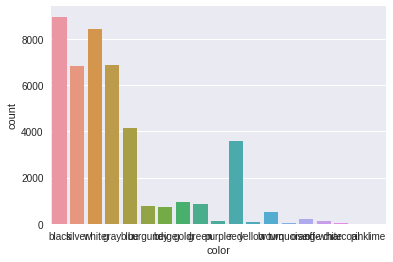

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

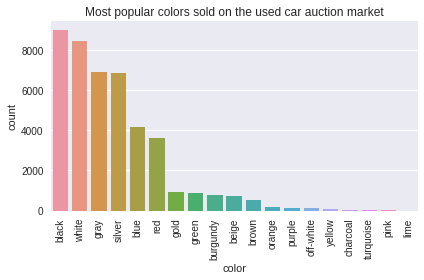

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.


large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

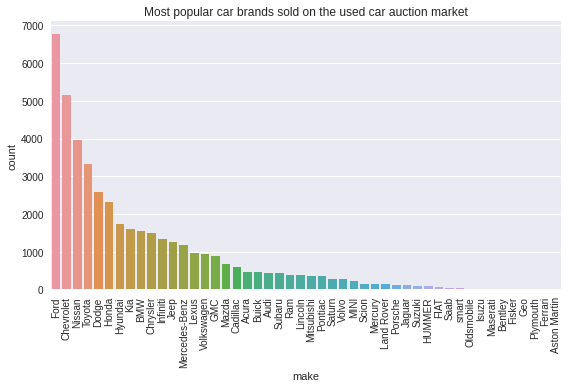

In [ ]:

large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

#Choosing the bar chart for visualisation

**Answer for Q1**: Ford, Chevrolet, nissan , Toyota

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

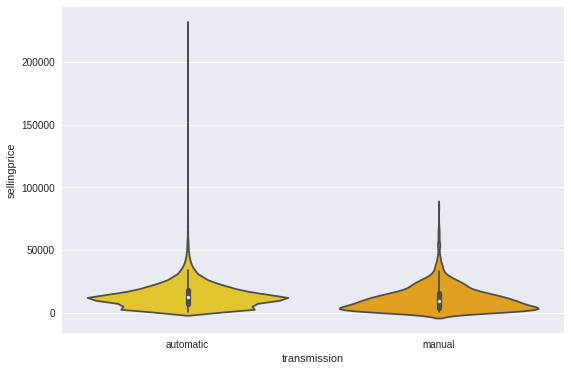

In [ ]:
f = plt.figure(figsize=(9,6))
sns.violinplot(x='transmission', y='sellingprice', data=df, palette='Wistia')
#Choosing the Violin plot for visualisation

**Answer for Q2**: Automatic transmissions averages a higher selling price than manual transmissions

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

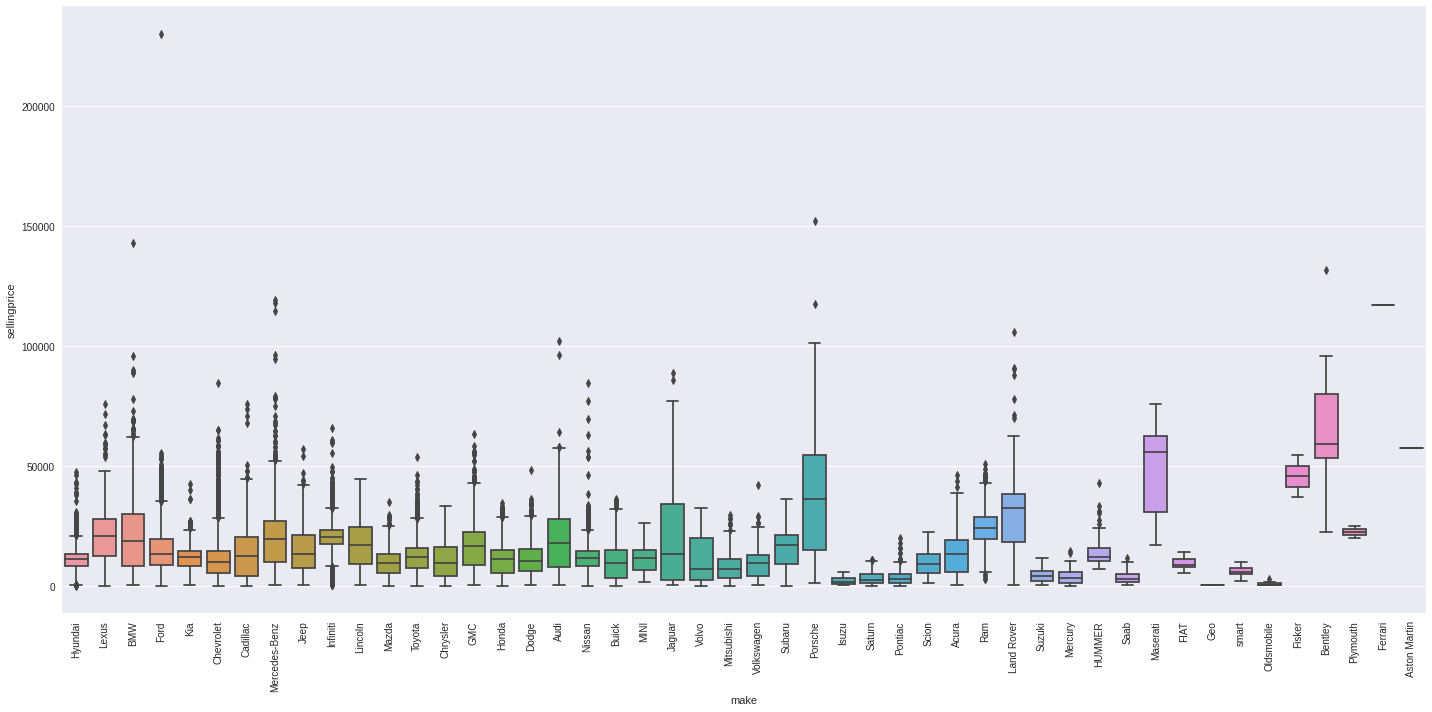

In [ ]:

f= plt.figure(figsize= (20,10))
sns.boxplot(x='make', y="sellingprice", data=df)
plt.xticks(rotation=90)
plt.tight_layout()

#Choosing the box plot for visualisation

**Answer for Q3**: The most expensive cars are Ford and Ferrari, while the top 2 cars distribution are Porsche and Jaguar 

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

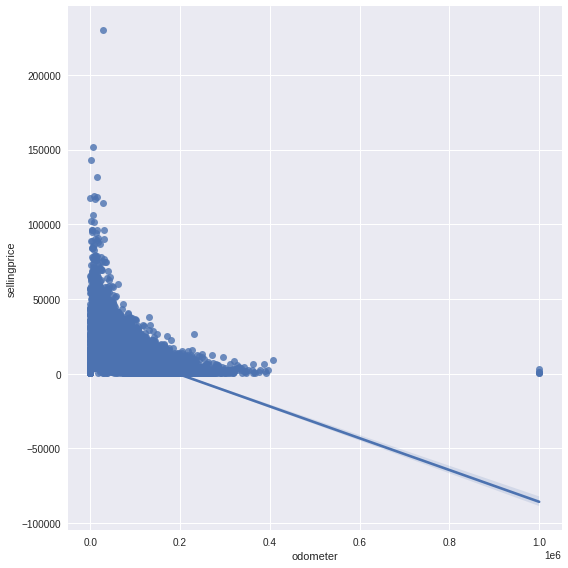

In [ ]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='viridis', height=8);

#Choosing the best fit line for visualisation

**Answer for Q4**: Negatively correlated, as the miles increase the price decrease

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

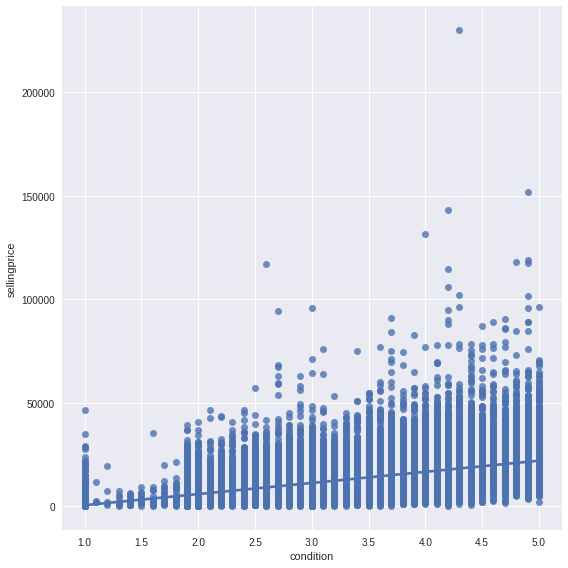

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='viridis', height=8);
#Choosing the best fit line for visualisation

**Answer for Q5**: Positively correlated, as the condition gets better and rating increases the selling price increase.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

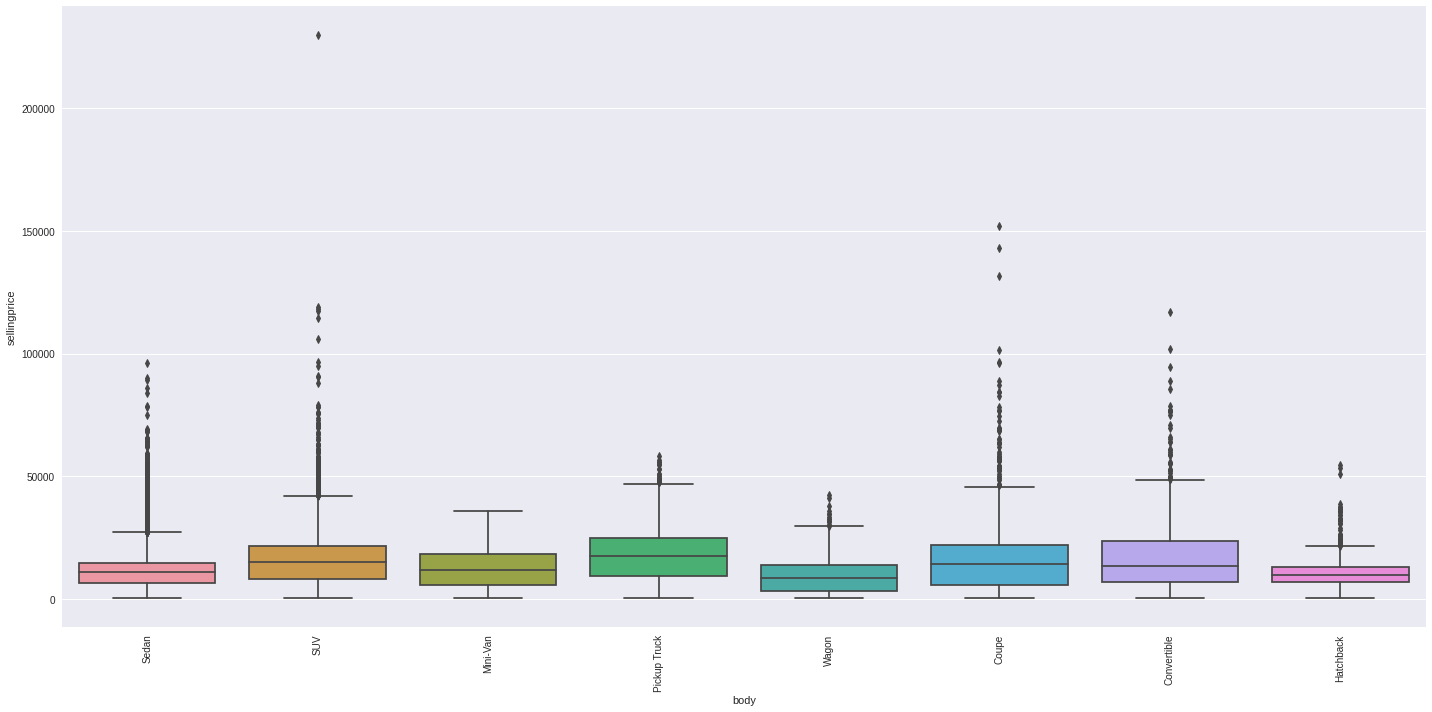

In [ ]:
f= plt.figure(figsize= (20,10))
sns.boxplot(x='body', y="sellingprice", data=df)
plt.xticks(rotation=90)
plt.tight_layout()

#Choosing the box plot for visualisation

**Answer for Q6**: Yes there are differences, with order from highest to lowest (Pickup Truck,SUV,Coupe,Convertible,Mini-Van,Sedan,Wagon,Hatchback)

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df.drop(columns=['model', 'trim','vin','saledate','interior','seller'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
categorical_columns = ['make', 'transmission', 'body', 'state', 'color']
df_encoded = pd.get_dummies(data=df, columns=categorical_columns, dtype='int8')
df_encoded.head()


,year,condition,odometer,mmr,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_FIAT,make_Ferrari,make_Fisker,make_Ford,make_GMC,make_Geo,make_HUMMER,make_Honda,make_Hyundai,make_Infiniti,make_Isuzu,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_MINI,make_Maserati,make_Mazda,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,...,state_mn,state_mo,state_ms,state_nc,state_ne,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_pr,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi,color_beige,color_black,color_blue,color_brown,color_burgundy,color_charcoal,color_gold,color_gray,color_green,color_lime,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow
0,2013,3.9,50404.0,11000,10900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,22200,24200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2002,1.9,145303.0,3675,3200,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22500,22100,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2014,4.6,8386.0,15100,15500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train);

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
linear_reg.score(X_test, y_test)


0.974867454561453

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The model met the necessary assumption because after testing the linear regression model it produced a score of 97.5% which is a pretty high score proving good results